In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ppt
from scipy.signal import detrend
from sklearn.preprocessing import StandardScaler

In [21]:
data = pd.read_csv("metaursus.csv")
years = data.iloc[:,0].values
births = data.iloc[:,1].values
native = data.iloc[:,2].values
wages = data.iloc[:,3].values
unity = data.iloc[:,4].values

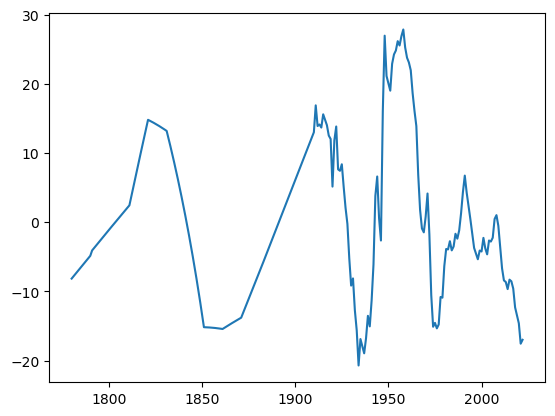

In [22]:
births = detrend(births)
ppt.plot(years,births)

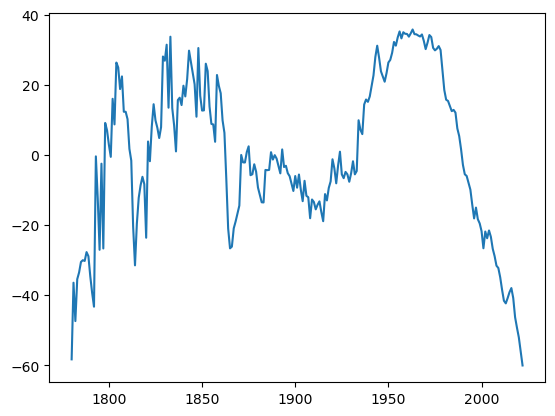

In [23]:
wages = detrend(wages)
ppt.plot(years,wages)

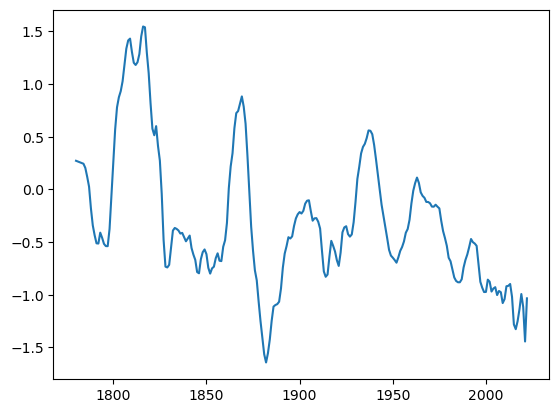

In [24]:
ppt.plot(years,unity)

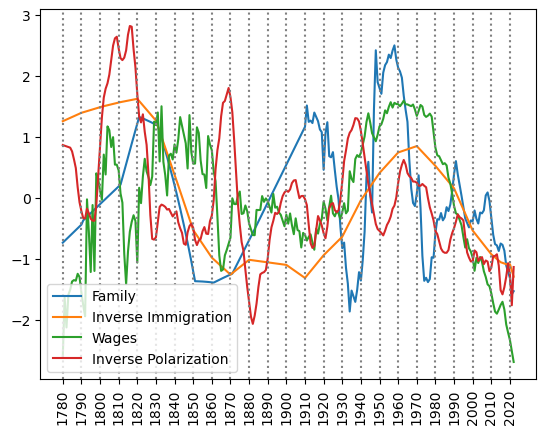

In [25]:
scaler = StandardScaler()
set = np.stack((births,native,wages,unity),axis=1)
set = scaler.fit_transform(set)
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")
ppt.plot(years,set)
ppt.legend(['Family','Inverse Immigration','Wages','Inverse Polarization'])
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')

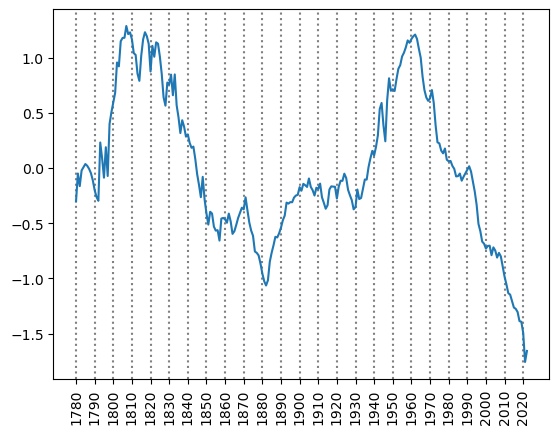

In [26]:
avg = (set[:,0]+set[:,1]+set[:,2]+set[:,3])/4
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")
ppt.plot(years,avg)

243


([<matplotlib.axis.XTick at 0x1d1eb93b040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

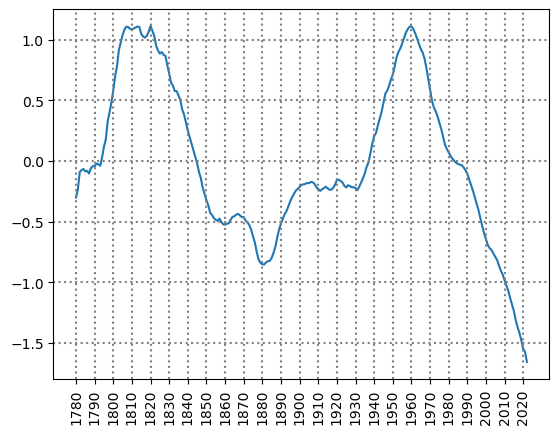

In [27]:
def movingAvg(data):
    sma = list()
    sma.append(data[0])
    sma.append((data[0]+data[2])/2)
    sma.append((data[0]+data[1]+data[3]+data[4])/4)
    sma.append((data[0]+data[1]+data[2]+data[4]+data[5]+data[6])/6)
    sma.append((data[0]+data[1]+data[2]+data[3]+data[5]+data[6]+data[7]+data[8])/8)
    for s in range(5,238):
        sma.append((data[s-5]+data[s-4]+data[s-3]+data[s-2]+data[s-1]+data[s+1]+data[s+2]+data[s+3]+data[s+4]+data[s+5])/10)
    sma.append((data[234]+data[235]+data[236]+data[237]+data[239]+data[240]+data[241]+data[242])/8)
    sma.append((data[236]+data[237]+data[238]+data[240]+data[241]+data[242])/6)
    sma.append((data[238]+data[239]+data[241]+data[242])/4)
    sma.append((data[240]+data[242])/2)
    sma.append(data[242])
    return np.array(sma).reshape(-1,1)
ma = movingAvg(avg)
print(len(ma))
ppt.plot(years,ma)
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')
for k in range(-15,15,5):
    ppt.axhline(y=k/10,color='grey',linestyle='dotted')
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")

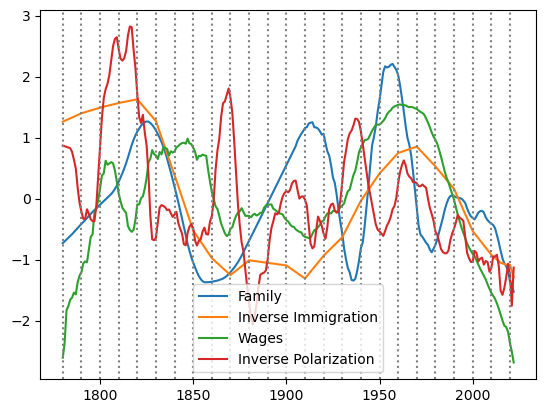

In [28]:
births = movingAvg(set[:,0])
native = set[:,1]
wages = movingAvg(set[:,2])
unity = set[:,3]
ppt.plot(years,births)
ppt.plot(years,native)
ppt.plot(years,wages)
ppt.plot(years,unity)
ppt.legend(['Family','Inverse Immigration','Wages','Inverse Polarization'])
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')

38


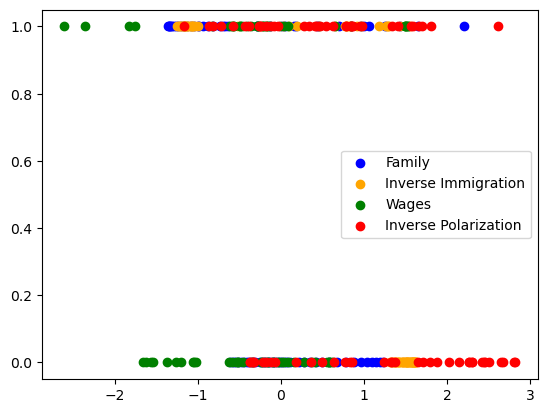

In [29]:
def xfy(data):
    rev = [data[0,:],data[1,:],data[2,:],data[3,:]]
    ante = [data[14,:],data[28,:],data[51,:],data[54,:],data[81,:],data[82,:],data[83,:],data[84,:],data[85,:]]
    post = [data[86,:],data[87,:],data[88,:],data[89,:],data[90,:],data[91,:],data[92,:],data[93,:],data[94,:],data[95,:]]
    end = [data[96,:],data[97,:],data[98,:],data[114,:],data[134,:],data[152,:],data[163,:],data[177,:],data[182,:]]
    boom = [data[183,:],data[185,:],data[187,:],data[188,:],data[209,:],data[212,:]]
    all = rev + ante + post + end + boom
    return all

def x1fy(data):
    ante = [data[4,:],data[5,:],data[6,:],data[7,:],data[8,:],data[9,:],data[10,:],data[11,:],data[12,:],data[13,:]]
    tula = [data[15,:],data[16,:],data[17,:],data[18,:],data[19,:],data[20,:],data[21,:],data[22,:],data[23,:],data[24,:]]
    tuva = [data[25,:],data[26,:],data[27,:],data[29,:],data[30,:],data[31,:],data[32,:],data[33,:],data[34,:],data[35,:]]
    post = [data[36,:],data[37,:],data[38,:],data[39,:],data[40,:],data[41,:],data[42,:],data[43,:]]
    all = ante + tula + tuva + post
    return all

y = xfy(years.reshape(-1,1))
xbirths = xfy(births)
xnative = xfy(native.reshape(-1,1))
xwages = xfy(wages)
xunity = xfy(unity.reshape(-1,1))
army = list()
narmy = list()

x1births = x1fy(births)
x1native = x1fy(native.reshape(-1,1))
x1wages = x1fy(wages)
x1unity = x1fy(unity.reshape(-1,1))

for l in range(len(xbirths)):
    army.append(1)
    narmy.append(0)

ppt.scatter(xbirths,army,color='blue')
ppt.scatter(xnative,army,color='orange')
ppt.scatter(xwages,army,color='green')
ppt.scatter(xunity,army,color='red')

ppt.scatter(x1births,narmy,color='blue')
ppt.scatter(x1native,narmy,color='orange')
ppt.scatter(x1wages,narmy,color='green')
ppt.scatter(x1unity,narmy,color='red')

ppt.legend(['Family','Inverse Immigration','Wages','Inverse Polarization'])

print(len(xbirths))

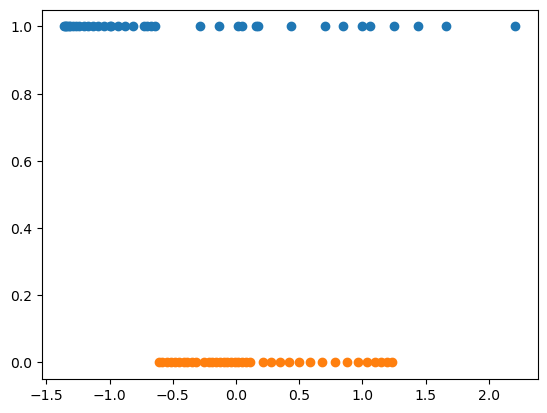

In [30]:
ppt.scatter(xbirths,army)
ppt.scatter(x1births,narmy)

In [31]:
from sklearn.linear_model import LinearRegression
y = army + narmy
print(y)
y = np.array(y)
print(y)
Xbirths = xbirths + x1births
Xbirths = np.array(Xbirths)
print(Xbirths)
birthsPred = LinearRegression().fit(Xbirths,y)
print(birthsPred.score(Xbirths,y))
birthScore = birthsPred.score(Xbirths,y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[-0.73052228]
 [-0.70074517]
 [-0.67102665]
 [-0.64137103]
 [-0.28364008]
 [ 0.15948702]
 [ 1.05933275]
 [ 0.84838407]
 [-1.35698569]
 [-1.35107801]
 [-1.34346163]
 [-1.33411963]
 [-1.32303482]
 [-1.31018973]
 [-1.29089754]
 [-1.26706461]
 [-1.23867836]
 [-1.20572613]
 [-1.16819513]
 [-1.13074157]
 [-1.0886969 ]
 [-1.04204813]
 [-0.99078212]
 [-0.93488564]
 [-0.87415716]
 [-0.81325277]
 [ 0.17713496]
 [ 1.25266979]
 [-0.99312765]
 [-0.1351263 ]
 [ 2.20848342]
 [ 1.65677832]
 [ 1.43663962]
 [ 0.99627617]
 [ 0.70490879]
 [ 0.43712064]
 [ 0.05037956]
 [ 0.01792946]
 [-0.61177874]
 [-0.58225021]
 [-0.54859346]


In [32]:
Xnative = xnative + x1native
Xnative = np.array(Xnative)
nativePred = LinearRegression().fit(Xnative,y)
print(nativePred.score(Xnative,y))
nativeScore = nativePred.score(Xnative,y)

0.5720092244057255


In [33]:
Xwages = xwages + x1wages
Xwages = np.array(Xwages)
wagesPred = LinearRegression().fit(Xwages,y)
print(wagesPred.score(Xwages,y))
wageScore = wagesPred.score(Xwages,y)

0.021320846904878232


In [34]:
Xunity = xunity + x1unity
Xunity = np.array(Xunity)
unityPred = LinearRegression().fit(Xunity,y)
unityScore = unityPred.score(Xunity,y)
print(unityScore)

0.140556008293514


([<matplotlib.axis.YTick at 0x1d1ebb18490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

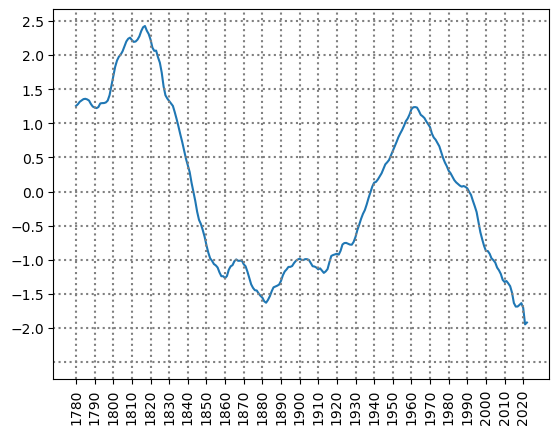

In [35]:
newAvg = ((births[:,0]*(birthScore/nativeScore)) + (native) + (wages[:,0]*(wageScore/nativeScore)) + (unity*(unityScore/nativeScore)))
ppt.plot(years,newAvg)
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')
for k in range(-25,30,5):
    ppt.axhline(y=k/10,color='grey',linestyle='dotted')
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")
ppt.yticks(np.arange(-2,3,0.5))

In [36]:
ultPred = LinearRegression().fit(np.array(xfy(newAvg.reshape(-1,1))+x1fy(newAvg.reshape(-1,1))),y)
print(ultPred.score(np.array(xfy(newAvg.reshape(-1,1))+x1fy(newAvg.reshape(-1,1))),y))

0.560104134284453


Text(0.5, 1.0, 'Year vs Inverse Political Stress')

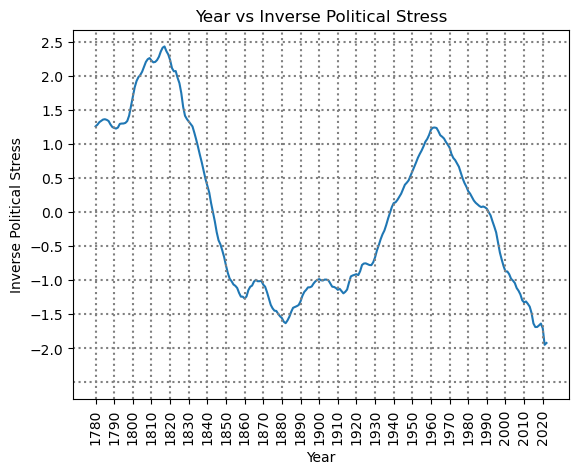

In [37]:
ppt.plot(years,newAvg)
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')
for k in range(-25,30,5):
    ppt.axhline(y=k/10,color='grey',linestyle='dotted')
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")
ppt.yticks(np.arange(-2,3,0.5))
ppt.xlabel('Year')
ppt.ylabel('Inverse Political Stress')
ppt.title('Year vs Inverse Political Stress')

Text(0.5, 0, 'Year')

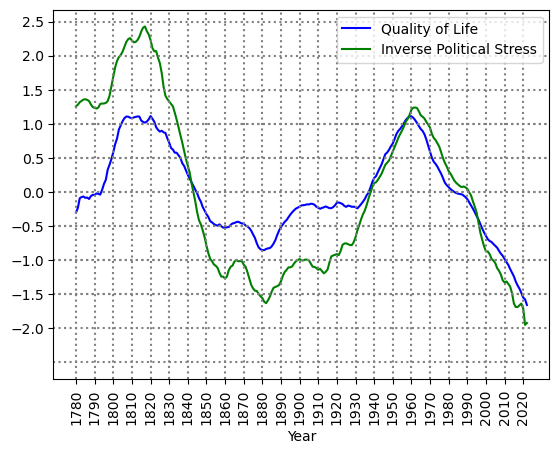

In [41]:
ppt.plot(years,ma,color='blue')
ppt.plot(years,newAvg,color='green')
ppt.legend(['Quality of Life','Inverse Political Stress'])
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')
for k in range(-15,15,5):
    ppt.axhline(y=k/10,color='grey',linestyle='dotted')
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")
ppt.yticks(np.arange(-2,3,0.5))
for k in range(-25,30,5):
    ppt.axhline(y=k/10,color='grey',linestyle='dotted')
ppt.xlabel('Year')